In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

In [ ]:
image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory='/content/drive/MyDrive/Data/Folder/train',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
                                                color_mode = "grayscale"
                                                )
testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory='/content/drive/MyDrive/Data/Folder/val',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
                                                 color_mode = "grayscale"
                                                 )

#final data set
new_data = image_generator.flow_from_directory(batch_size=128,
                                                 directory='/content/drive/MyDrive/New Data',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
                                                 color_mode = "grayscale"
                                                 )                          

Found 30402 images belonging to 6 classes.
Found 6516 images belonging to 6 classes.
Found 26124 images belonging to 6 classes.


In [ ]:
training_set.class_indices

{'ANGER': 0,
 'DISGUST': 1,
 'FEAR': 2,
 'HAPPINESS': 3,
 'SADNESS': 4,
 'SURPRISE': 5}

In [ ]:
model = VGG19(
      input_shape = (48, 48, 3),
      include_top = False,
      weights = 'imagenet'
    )

In [ ]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(14, activation = "relu")(x)
x = Dense(6, activation = "softmax")(x)

model = keras.Model(model.input, x)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
119/119 [==============================] - 6081s 51s/step - loss: 1.1384 - accuracy: 0.5872 - val_loss: 0.8009 - val_accuracy: 0.7210
Epoch 2/5
119/119 [==============================] - 1113s 9s/step - loss: 0.7644 - accuracy: 0.7370 - val_loss: 0.6400 - val_accuracy: 0.7824
Epoch 3/5
119/119 [==============================] - 1108s 9s/step - loss: 0.6462 - accuracy: 0.7792 - val_loss: 0.5557 - val_accuracy: 0.8125
Epoch 4/5
119/119 [==============================] - 1109s 9s/step - loss: 0.5772 - accuracy: 0.8029 - val_loss: 0.5160 - val_accuracy: 0.8206
Epoch 5/5
119/119 [==============================] - 1112s 9s/step - loss: 0.5285 - accuracy: 0.8190 - val_loss: 0.4696 - val_accuracy: 0.8459


In [ ]:
hist = hist.history

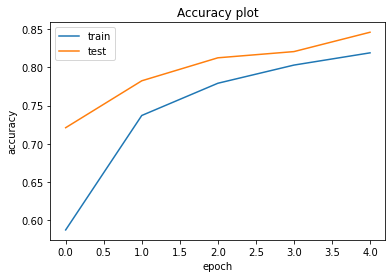

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("vgg19v2_accuracy.png")

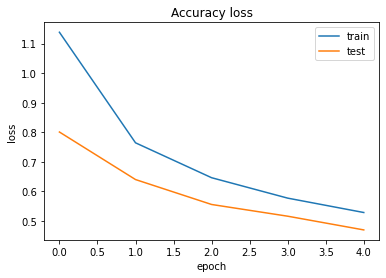

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("vgg19v2_loss.png")

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

model.compile(
    optimizer = "adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
hist1 = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
119/119 [==============================] - 1742s 15s/step - loss: 5.3594 - accuracy: 0.6646 - val_loss: 5.6055 - val_accuracy: 0.3002
Epoch 2/5
119/119 [==============================] - 1718s 14s/step - loss: 1.5559 - accuracy: 0.8581 - val_loss: 3.8732 - val_accuracy: 0.3002
Epoch 3/5
119/119 [==============================] - 1726s 15s/step - loss: 1.0101 - accuracy: 0.9417 - val_loss: 5.5074 - val_accuracy: 0.1894
Epoch 4/5
119/119 [==============================] - 1744s 15s/step - loss: 0.8707 - accuracy: 0.9625 - val_loss: 5.5998 - val_accuracy: 0.1978
Epoch 5/5
119/119 [==============================] - 1734s 15s/step - loss: 0.7971 - accuracy: 0.9672 - val_loss: 0.9124 - val_accuracy: 0.9357


In [ ]:
hist1 = hist1.history

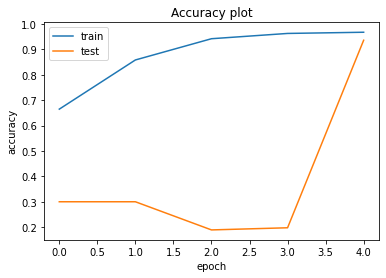

In [ ]:
plt.plot(hist1["accuracy"])
plt.plot(hist1["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("CNNv2_accuracy.png")

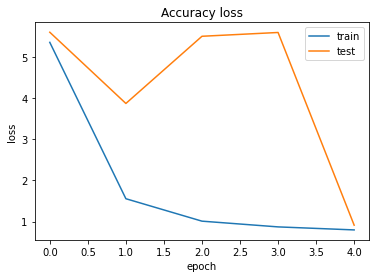

In [ ]:
plt.plot(hist1["loss"])
plt.plot(hist1["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("CNNv2_loss.png")

In [ ]:
hist_deployment = model.evaluate(new_data)

205/205 [==============================] - 5007s 25s/step - loss: 1.2085 - accuracy: 0.8438
